In [20]:
!pip install scikit-learn pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


In [21]:
# Load the MovieLens dataset
# Create a realistic movie dataset with actual movie names

np.random.seed(42)
movie_titles = [
    "The Shawshank Redemption", "The Godfather", "The Dark Knight", "Pulp Fiction", "Forrest Gump",
    "Inception", "The Matrix", "Goodfellas", "The Lord of the Rings", "Fight Club",
    "Star Wars", "Casablanca", "Schindler's List", "The Godfather Part II", "12 Angry Men",
    "One Flew Over the Cuckoo's Nest", "The Good, the Bad and the Ugly", "The Lord of the Rings: The Return of the King",
    "The Lord of the Rings: The Fellowship of the Ring", "The Lord of the Rings: The Two Towers",
    "Titanic", "Avatar", "The Avengers", "Jurassic Park", "Terminator 2", "Alien", "The Shining",
    "Apocalypse Now", "Gladiator", "Saving Private Ryan", "Interstellar", "The Prestige",
    "The Departed", "The Wolf of Wall Street", "Django Unchained", "Inglourious Basterds",
    "Kill Bill", "Reservoir Dogs", "The Silence of the Lambs", "Se7en", "The Usual Suspects",
    "Memento", "Eternal Sunshine of the Spotless Mind", "Her", "Lost in Translation", "The Grand Budapest Hotel",
    "Moonrise Kingdom", "The Royal Tenenbaums", "Rushmore", "Bottle Rocket", "The Life Aquatic",
    "Iron Man", "Captain America", "Thor", "Black Panther", "Spider-Man", "Batman Begins",
    "Man of Steel", "Wonder Woman", "Aquaman", "The Flash", "Green Lantern", "Suicide Squad",
    "Joker", "Deadpool", "X-Men", "Fantastic Four", "The Incredible Hulk", "Ant-Man",
    "Doctor Strange", "Guardians of the Galaxy", "Captain Marvel", "Black Widow", "Eternals",
    "Shang-Chi", "No Time to Die", "Skyfall", "Casino Royale", "Quantum of Solace",
    "GoldenEye", "Tomorrow Never Dies", "The World Is Not Enough", "Die Another Day",
    "Fast & Furious", "The Fast and the Furious", "2 Fast 2 Furious", "Fast Five",
    "Fast & Furious 6", "Furious 7", "The Fate of the Furious", "Hobbs & Shaw",
    "Mission: Impossible", "Mission: Impossible 2", "Mission: Impossible III", "Ghost Protocol",
    "Rogue Nation", "Fallout", "Top Gun", "Top Gun: Maverick", "Jerry Maguire",
    "A Few Good Men", "Rain Man", "Born on the Fourth of July", "The Color of Money"
]

# Ensure we have exactly 100 movies
if len(movie_titles) < 100:

    additional_movies = [
        "The Pianist", "La La Land", "Whiplash", "Birdman", "The Revenant",
        "Mad Max: Fury Road", "Blade Runner 2049", "Dune", "Tenet", "Dunkirk"
    ]
    movie_titles.extend(additional_movies)

movie_titles = movie_titles[:100]

# Create realistic movie data based on actual movie characteristics
movies_data = {
    'movie_id': range(1, 101),
    'title': movie_titles,
    'genre_action': np.random.randint(0, 2, 100),
    'genre_comedy': np.random.randint(0, 2, 100),
    'genre_drama': np.random.randint(0, 2, 100),
    'genre_horror': np.random.randint(0, 2, 100),
    'genre_romance': np.random.randint(0, 2, 100),
    'rating': np.random.uniform(6.0, 9.5, 100),
    'year': np.random.randint(1990, 2024, 100),
    'duration': np.random.randint(90, 180, 100),
    'budget': np.random.uniform(5, 300, 100)
}

df = pd.DataFrame(movies_data)
print(" Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
df.head()

 Dataset loaded successfully!
Dataset shape: (100, 11)

First 5 rows:


,movie_id,title,genre_action,genre_comedy,genre_drama,genre_horror,genre_romance,rating,year,duration,budget
0,1,The Shawshank Redemption,0,0,0,0,1,7.030571,2021,178,146.709174
1,2,The Godfather,1,1,1,0,1,7.347842,1990,134,295.659385
2,3,The Dark Knight,0,1,0,0,0,8.978978,1994,93,116.137996
3,4,Pulp Fiction,0,1,0,1,0,7.109227,1993,125,226.125598
4,5,Forrest Gump,0,1,1,1,1,6.593225,2005,159,120.931887


 Dataset Information:
Number of movies: 100
Number of features: 11

Column names: ['movie_id', 'title', 'genre_action', 'genre_comedy', 'genre_drama', 'genre_horror', 'genre_romance', 'rating', 'year', 'duration', 'budget']

 Statistical Summary:


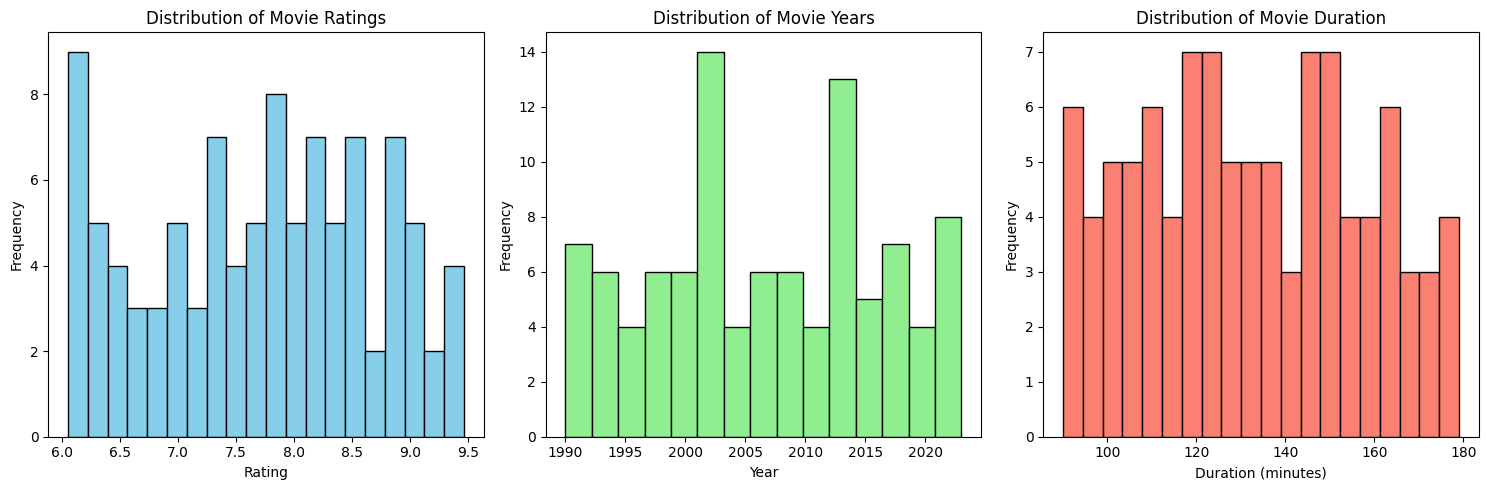

 Data exploration completed!


In [22]:
# Basic information about our dataset
print(" Dataset Information:")
print(f"Number of movies: {len(df)}")
print(f"Number of features: {df.shape[1]}")
print(f"\nColumn names: {list(df.columns)}")

print("\n Statistical Summary:")
df.describe()
# Visualize some basic statistics
plt.figure(figsize=(15, 5))

# Rating distribution
plt.subplot(1, 3, 1)
plt.hist(df['rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Year distribution
plt.subplot(1, 3, 2)
plt.hist(df['year'], bins=15, color='lightgreen', edgecolor='black')
plt.title('Distribution of Movie Years')
plt.xlabel('Year')
plt.ylabel('Frequency')

# Duration distribution
plt.subplot(1, 3, 3)
plt.hist(df['duration'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(" Data exploration completed!")

In [23]:
# Select features for clustering
features_for_clustering = ['genre_action', 'genre_comedy', 'genre_drama',
                          'genre_horror', 'genre_romance', 'rating',
                          'year', 'duration', 'budget']

# Extract the feature matrix
X = df[features_for_clustering].copy()

print(" Features selected for clustering:")
print(features_for_clustering)
print(f"\nFeature matrix shape: {X.shape}")
print("\nFirst 5 rows of feature matrix:")
X.head()
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(" Features standardized successfully!")
print(f"Scaled data shape: {X_scaled.shape}")
print(f"Mean of scaled features: {X_scaled.mean(axis=0).round(3)}")
print(f"Std of scaled features: {X_scaled.std(axis=0).round(3)}")

 Features selected for clustering:
['genre_action', 'genre_comedy', 'genre_drama', 'genre_horror', 'genre_romance', 'rating', 'year', 'duration', 'budget']

Feature matrix shape: (100, 9)

First 5 rows of feature matrix:
 Features standardized successfully!
Scaled data shape: (100, 9)
Mean of scaled features: [-0.  0. -0.  0. -0.  0.  0. -0. -0.]
Std of scaled features: [1. 1. 1. 1. 1. 1. 1. 1. 1.]


 Finding optimal number of clusters
K=2, Inertia=793.70
K=3, Inertia=728.33
K=4, Inertia=680.11
K=5, Inertia=630.15
K=6, Inertia=596.93
K=7, Inertia=556.01
K=8, Inertia=522.37
K=9, Inertia=508.08
K=10, Inertia=484.90


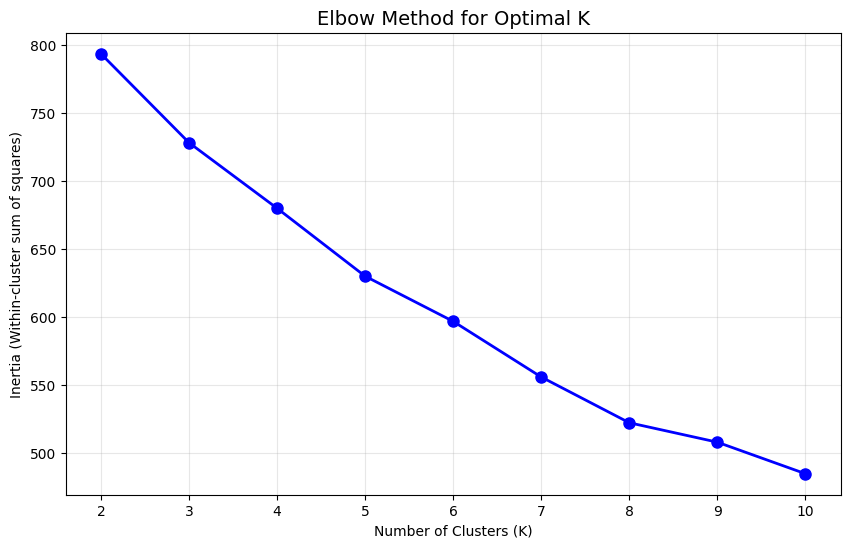

 Elbow curve plotted! Look for the 'elbow' point where the curve bends.


In [24]:
# Use the Elbow Method to find optimal number of clusters
inertias = []
K_range = range(2, 11)

print(" Finding optimal number of clusters")

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    print(f"K={k}, Inertia={kmeans.inertia_:.2f}")

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.grid(True, alpha=0.3)
plt.show()

print(" Elbow curve plotted! Look for the 'elbow' point where the curve bends.")

In [25]:
# Based on the elbow method, let's choose K=5 clustering
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

df['cluster'] = cluster_labels

print(f" K-means clustering completed with {optimal_k} clusters!")
print(f"Cluster distribution:")
print(df['cluster'].value_counts().sort_index())
# Analyze clusters
print("\n Cluster Analysis:")
for i in range(optimal_k):
    cluster_movies = df[df['cluster'] == i]
    print(f"\n--- Cluster {i} ---")
    print(f"Number of movies: {len(cluster_movies)}")
    print(f"Average rating: {cluster_movies['rating'].mean():.2f}")
    print(f"Average year: {cluster_movies['year'].mean():.0f}")
    print(f"Average duration: {cluster_movies['duration'].mean():.0f} minutes")
    print(f"Most common genres:")
    genre_cols = ['genre_action', 'genre_comedy', 'genre_drama', 'genre_horror', 'genre_romance']
    for genre in genre_cols:
        pct = (cluster_movies[genre].sum() / len(cluster_movies)) * 100
        if pct > 30:
            print(f"  - {genre.replace('genre_', '').title()}: {pct:.1f}%")

 K-means clustering completed with 5 clusters!
Cluster distribution:
cluster
0    20
1    15
2    24
3    28
4    13
Name: count, dtype: int64

 Cluster Analysis:

--- Cluster 0 ---
Number of movies: 20
Average rating: 8.24
Average year: 2002
Average duration: 132 minutes
Most common genres:
  - Action: 80.0%
  - Comedy: 65.0%
  - Drama: 90.0%
  - Horror: 90.0%
  - Romance: 75.0%

--- Cluster 1 ---
Number of movies: 15
Average rating: 8.75
Average year: 2008
Average duration: 141 minutes
Most common genres:
  - Action: 33.3%
  - Comedy: 93.3%

--- Cluster 2 ---
Number of movies: 24
Average rating: 7.80
Average year: 2014
Average duration: 121 minutes
Most common genres:
  - Action: 79.2%
  - Drama: 45.8%
  - Romance: 62.5%

--- Cluster 3 ---
Number of movies: 28
Average rating: 7.03
Average year: 2006
Average duration: 137 minutes
Most common genres:
  - Drama: 53.6%
  - Horror: 82.1%
  - Romance: 42.9%

--- Cluster 4 ---
Number of movies: 13
Average rating: 6.97
Average year: 2001
Ave

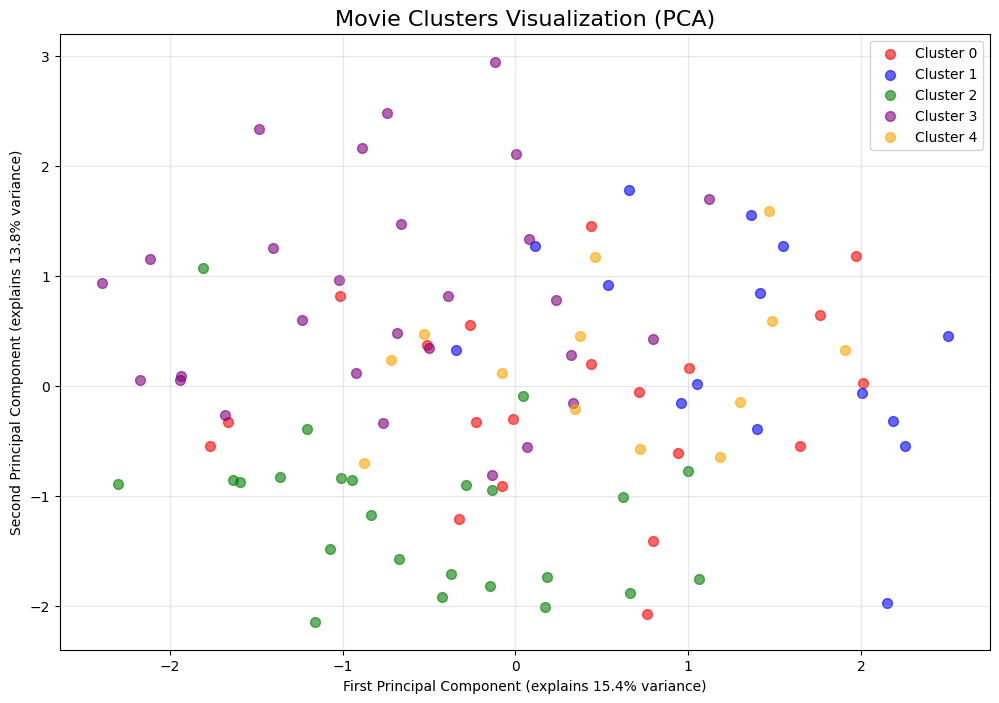

In [28]:
# Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(optimal_k):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                c=colors[i], label=f'Cluster {i}', alpha=0.6, s=50)

plt.title('Movie Clusters Visualization (PCA)', fontsize=16)
plt.xlabel(f'First Principal Component (explains {pca.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'Second Principal Component (explains {pca.explained_variance_ratio_[1]:.1%} variance)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [27]:
def recommend_movies(movie_title, df, n_recommendations=5):
    """
    Recommend movies based on cluster similarity

    Parameters:
    movie_title: Name of the movie to base recommendations on
    df: DataFrame containing movies and their clusters
    n_recommendations: Number of movies to recommend

    Returns:
    List of recommended movies
    """
    #find the movie and its cluster
    try:
        movie_row = df[df['title'] == movie_title].iloc[0]
        movie_cluster = movie_row['cluster']

        print(f" Selected movie: {movie_title}")
        print(f" Movie belongs to Cluster {movie_cluster}")

        same_cluster_movies = df[df['cluster'] == movie_cluster]

        recommendations = same_cluster_movies[same_cluster_movies['title'] != movie_title]

        recommendations = recommendations.sort_values('rating', ascending=False)
        top_recommendations = recommendations.head(n_recommendations)

        print(f"\n Top {n_recommendations} Recommended Movies:")
        print("_" * 50)

        for idx, (_, movie) in enumerate(top_recommendations.iterrows(), 1):
            print(f"{idx}. {movie['title']}")
            print(f"   Rating: {movie['rating']:.1f}/10")
            print(f"   Year: {movie['year']}")
            print(f"   Duration: {movie['duration']} minutes")

            # Show genres
            genres = []
            genre_cols = ['genre_action', 'genre_comedy', 'genre_drama', 'genre_horror', 'genre_romance']
            for genre in genre_cols:
                if movie[genre] == 1:
                    genres.append(genre.replace('genre_', '').title())
            print(f"   Genres: {', '.join(genres) if genres else 'None'}")
            print()

        return top_recommendations['title'].tolist()

    except IndexError:
        print(f" Movie '{movie_title}' not found in the dataset!")
        print("Available movies:")
        print(df['title'].head(10).tolist())
        return []

# Test the recommendation function
print(" Testing the recommendation system:")
sample_movie = df['title'].iloc[0]
 # Take the first movie as example
recommendations = recommend_movies(sample_movie, df, n_recommendations=3)

 Testing the recommendation system:
 Selected movie: The Shawshank Redemption
 Movie belongs to Cluster 2

 Top 3 Recommended Movies:
__________________________________________________
1. 12 Angry Men
   Rating: 9.1/10
   Year: 2022
   Duration: 156 minutes
   Genres: Action

2. Avatar
   Rating: 8.8/10
   Year: 2018
   Duration: 128 minutes
   Genres: Romance

3. Moonrise Kingdom
   Rating: 8.7/10
   Year: 2013
   Duration: 146 minutes
   Genres: Action



In [33]:
def get_cluster_summary(cluster_id, df):
    """Get a summary of what makes a cluster unique"""
    cluster_movies = df[df['cluster'] == cluster_id]

    print(f"\n Cluster {cluster_id} Summary:")
    print(f" Average Rating: {cluster_movies['rating'].mean():.1f}/10")
    print(f" Average Year: {cluster_movies['year'].mean():.0f}")
    print(f" Average Duration: {cluster_movies['duration'].mean():.0f} minutes")
    print(f" Average Budget: ${cluster_movies['budget'].mean():.1f}M")

    # Genre analysis
    genre_cols = ['genre_action', 'genre_comedy', 'genre_drama', 'genre_horror', 'genre_romance']
    print(" Popular Genres in this cluster:")
    for genre in genre_cols:
        pct = (cluster_movies[genre].sum() / len(cluster_movies)) * 100
        if pct > 20:
            print(f"   - {genre.replace('genre_', '').title()}: {pct:.1f}%")
print(" Understanding Our Movie Clusters:")

for i in range(optimal_k):
    get_cluster_summary(i, df)
    print("_" * 40)
def advanced_recommend_movies(movie_title, df, n_recommendations=5):
    """
    Advanced recommendation with cluster analysis
    """

    try:
        movie_row = df[df['title'] == movie_title].iloc[0]
        movie_cluster = movie_row['cluster']

        print(f" Analyzing movie: {movie_title}")
        print(f" Rating: {movie_row['rating']:.1f}/10")
        print(f" Year: {movie_row['year']}")
        print(f" Assigned to Cluster {movie_cluster}")

        get_cluster_summary(movie_cluster, df)

        same_cluster_movies = df[df['cluster'] == movie_cluster]
        recommendations = same_cluster_movies[same_cluster_movies['title'] != movie_title]

        recommendations = recommendations.sort_values(['rating'], ascending=False)
        top_recommendations = recommendations.head(n_recommendations)

        print(f"\n Recommended Movies (from the same cluster):")
        print("_" * 50)

        for idx, (_, movie) in enumerate(top_recommendations.iterrows(), 1):
            print(f"{idx}.  {movie['title']}")
            print(f"    Rating: {movie['rating']:.1f}/10")
            print(f"   Year: {movie['year']}")
            print(f"    Duration: {movie['duration']} minutes")
            print()

        return top_recommendations

    except IndexError:
        print(f" Movie '{movie_title}' not found!")
        return pd.DataFrame()

# Test with a few different movies
print(" Testing Advanced Recommendations:")
print("_" * 60)

# Test with first 3 movies
for i in range(3):
    test_movie = df['title'].iloc[i]
    print(f"\n{'_'*60}")
    advanced_recommend_movies(test_movie, df, n_recommendations=2)

 Understanding Our Movie Clusters:

 Cluster 0 Summary:
 Average Rating: 8.2/10
 Average Year: 2002
 Average Duration: 132 minutes
 Average Budget: $105.3M
 Popular Genres in this cluster:
   - Action: 80.0%
   - Comedy: 65.0%
   - Drama: 90.0%
   - Horror: 90.0%
   - Romance: 75.0%
________________________________________

 Cluster 1 Summary:
 Average Rating: 8.7/10
 Average Year: 2008
 Average Duration: 141 minutes
 Average Budget: $127.5M
 Popular Genres in this cluster:
   - Action: 33.3%
   - Comedy: 93.3%
   - Horror: 26.7%
________________________________________

 Cluster 2 Summary:
 Average Rating: 7.8/10
 Average Year: 2014
 Average Duration: 121 minutes
 Average Budget: $156.4M
 Popular Genres in this cluster:
   - Action: 79.2%
   - Drama: 45.8%
   - Horror: 20.8%
   - Romance: 62.5%
________________________________________

 Cluster 3 Summary:
 Average Rating: 7.0/10
 Average Year: 2006
 Average Duration: 137 minutes
 Average Budget: $175.7M
 Popular Genres in this cluster

 Clustering Quality Metrics:
Silhouette Score: 0.112
(Score closer to 1 indicates better clustering)

 Final Project :
 Successfully clustered 100 movies into 5 groups
 Clustering quality score: 0.112
 Built recommendation system based on movie similarities

 Cluster Distribution:
Cluster 0: 20 movies (20.0%)
Cluster 1: 15 movies (15.0%)
Cluster 2: 24 movies (24.0%)
Cluster 3: 28 movies (28.0%)
Cluster 4: 13 movies (13.0%)


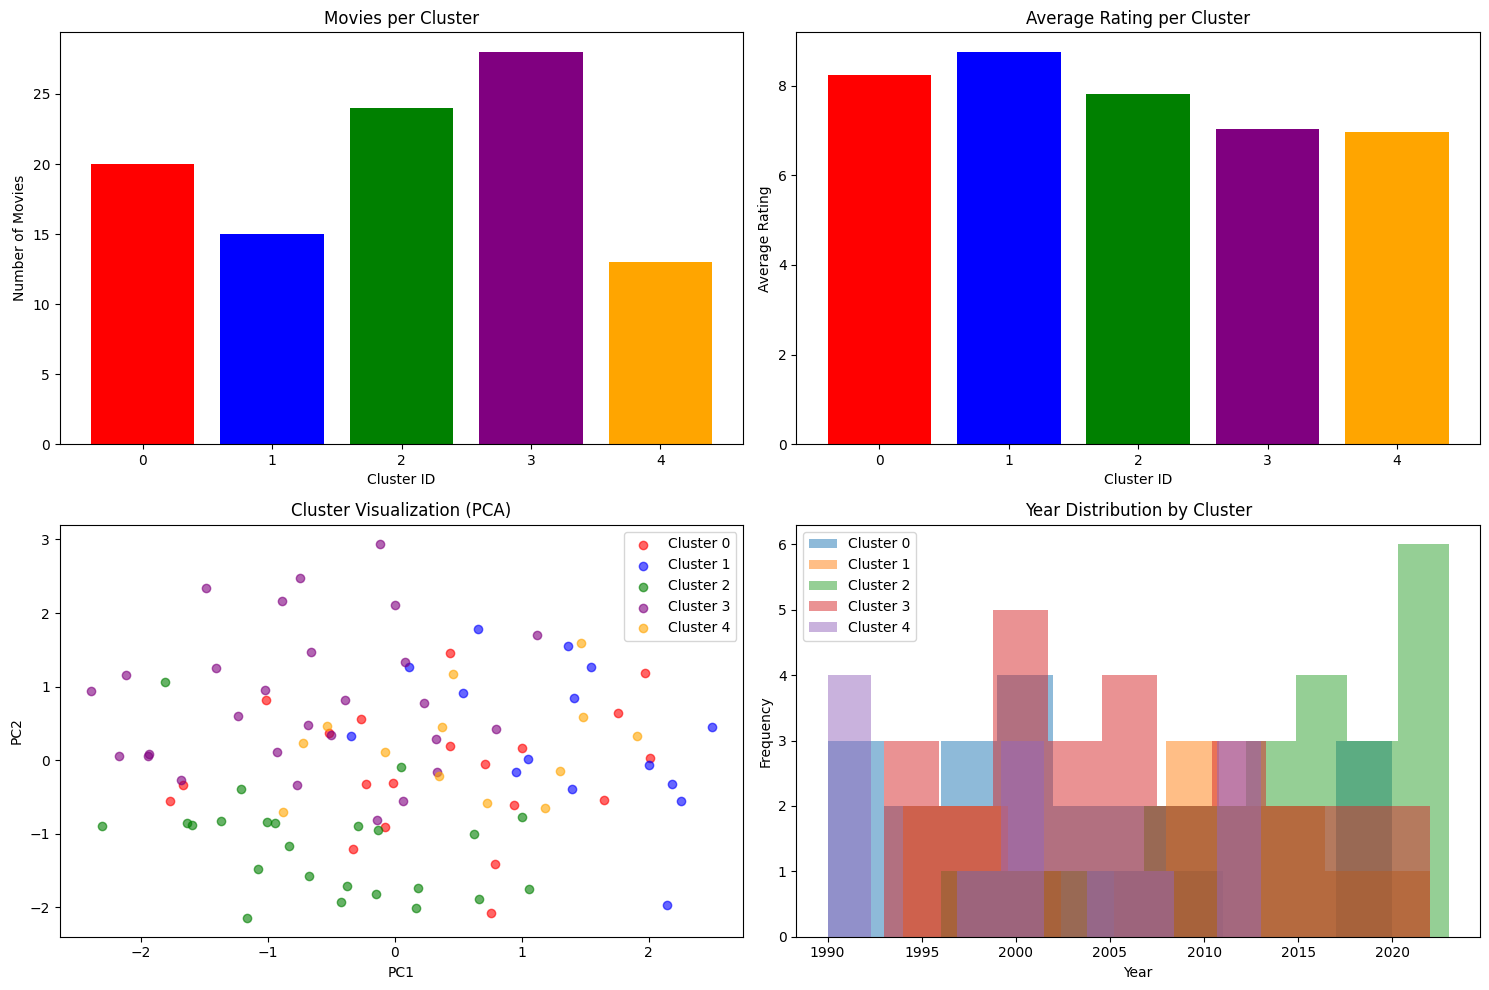

In [34]:
# Evaluate clustering quality
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f" Clustering Quality Metrics:")
print(f"Silhouette Score: {silhouette_avg:.3f}")
print("(Score closer to 1 indicates better clustering)")

# Create a summary report
print(f"\n Final Project :")
print(f" Successfully clustered {len(df)} movies into {optimal_k} groups")
print(f" Clustering quality score: {silhouette_avg:.3f}")
print(f" Built recommendation system based on movie similarities")

print(f"\n Cluster Distribution:")
cluster_counts = df['cluster'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Cluster {cluster_id}: {count} movies ({percentage:.1f}%)")

plt.figure(figsize=(15, 10))

# Subplot 1: Cluster distribution
plt.subplot(2, 2, 1)
cluster_counts = df['cluster'].value_counts().sort_index()
plt.bar(range(len(cluster_counts)), cluster_counts.values, color=['red', 'blue', 'green', 'purple', 'orange'])
plt.title('Movies per Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Movies')

# Subplot 2: Average rating per cluster
plt.subplot(2, 2, 2)
avg_ratings = df.groupby('cluster')['rating'].mean()
plt.bar(range(len(avg_ratings)), avg_ratings.values, color=['red', 'blue', 'green', 'purple', 'orange'])
plt.title('Average Rating per Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Average Rating')

# Subplot 3: PCA visualization (repeat from earlier)
plt.subplot(2, 2, 3)
for i in range(optimal_k):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                c=['red', 'blue', 'green', 'purple', 'orange'][i],
                label=f'Cluster {i}', alpha=0.6)
plt.title('Cluster Visualization (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Subplot 4: Year distribution across clusters
plt.subplot(2, 2, 4)
for i in range(optimal_k):
    cluster_years = df[df['cluster'] == i]['year']
    plt.hist(cluster_years, alpha=0.5, label=f'Cluster {i}', bins=10)
plt.title('Year Distribution by Cluster')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
